In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
segment = gpd.read_file('segments_geometry.geojson')
segment.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   segment_id  792 non-null    object  
 1   road_name   792 non-null    object  
 2   geometry    792 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 18.7+ KB


In [3]:
invalid_geom = segment[~segment.geometry.is_valid]
nan_geom = segment[segment.geometry.isna()]

print("Invalid Geometries:", len(invalid_geom))
print("NaN Geometries:", len(nan_geom))


Invalid Geometries: 0
NaN Geometries: 0


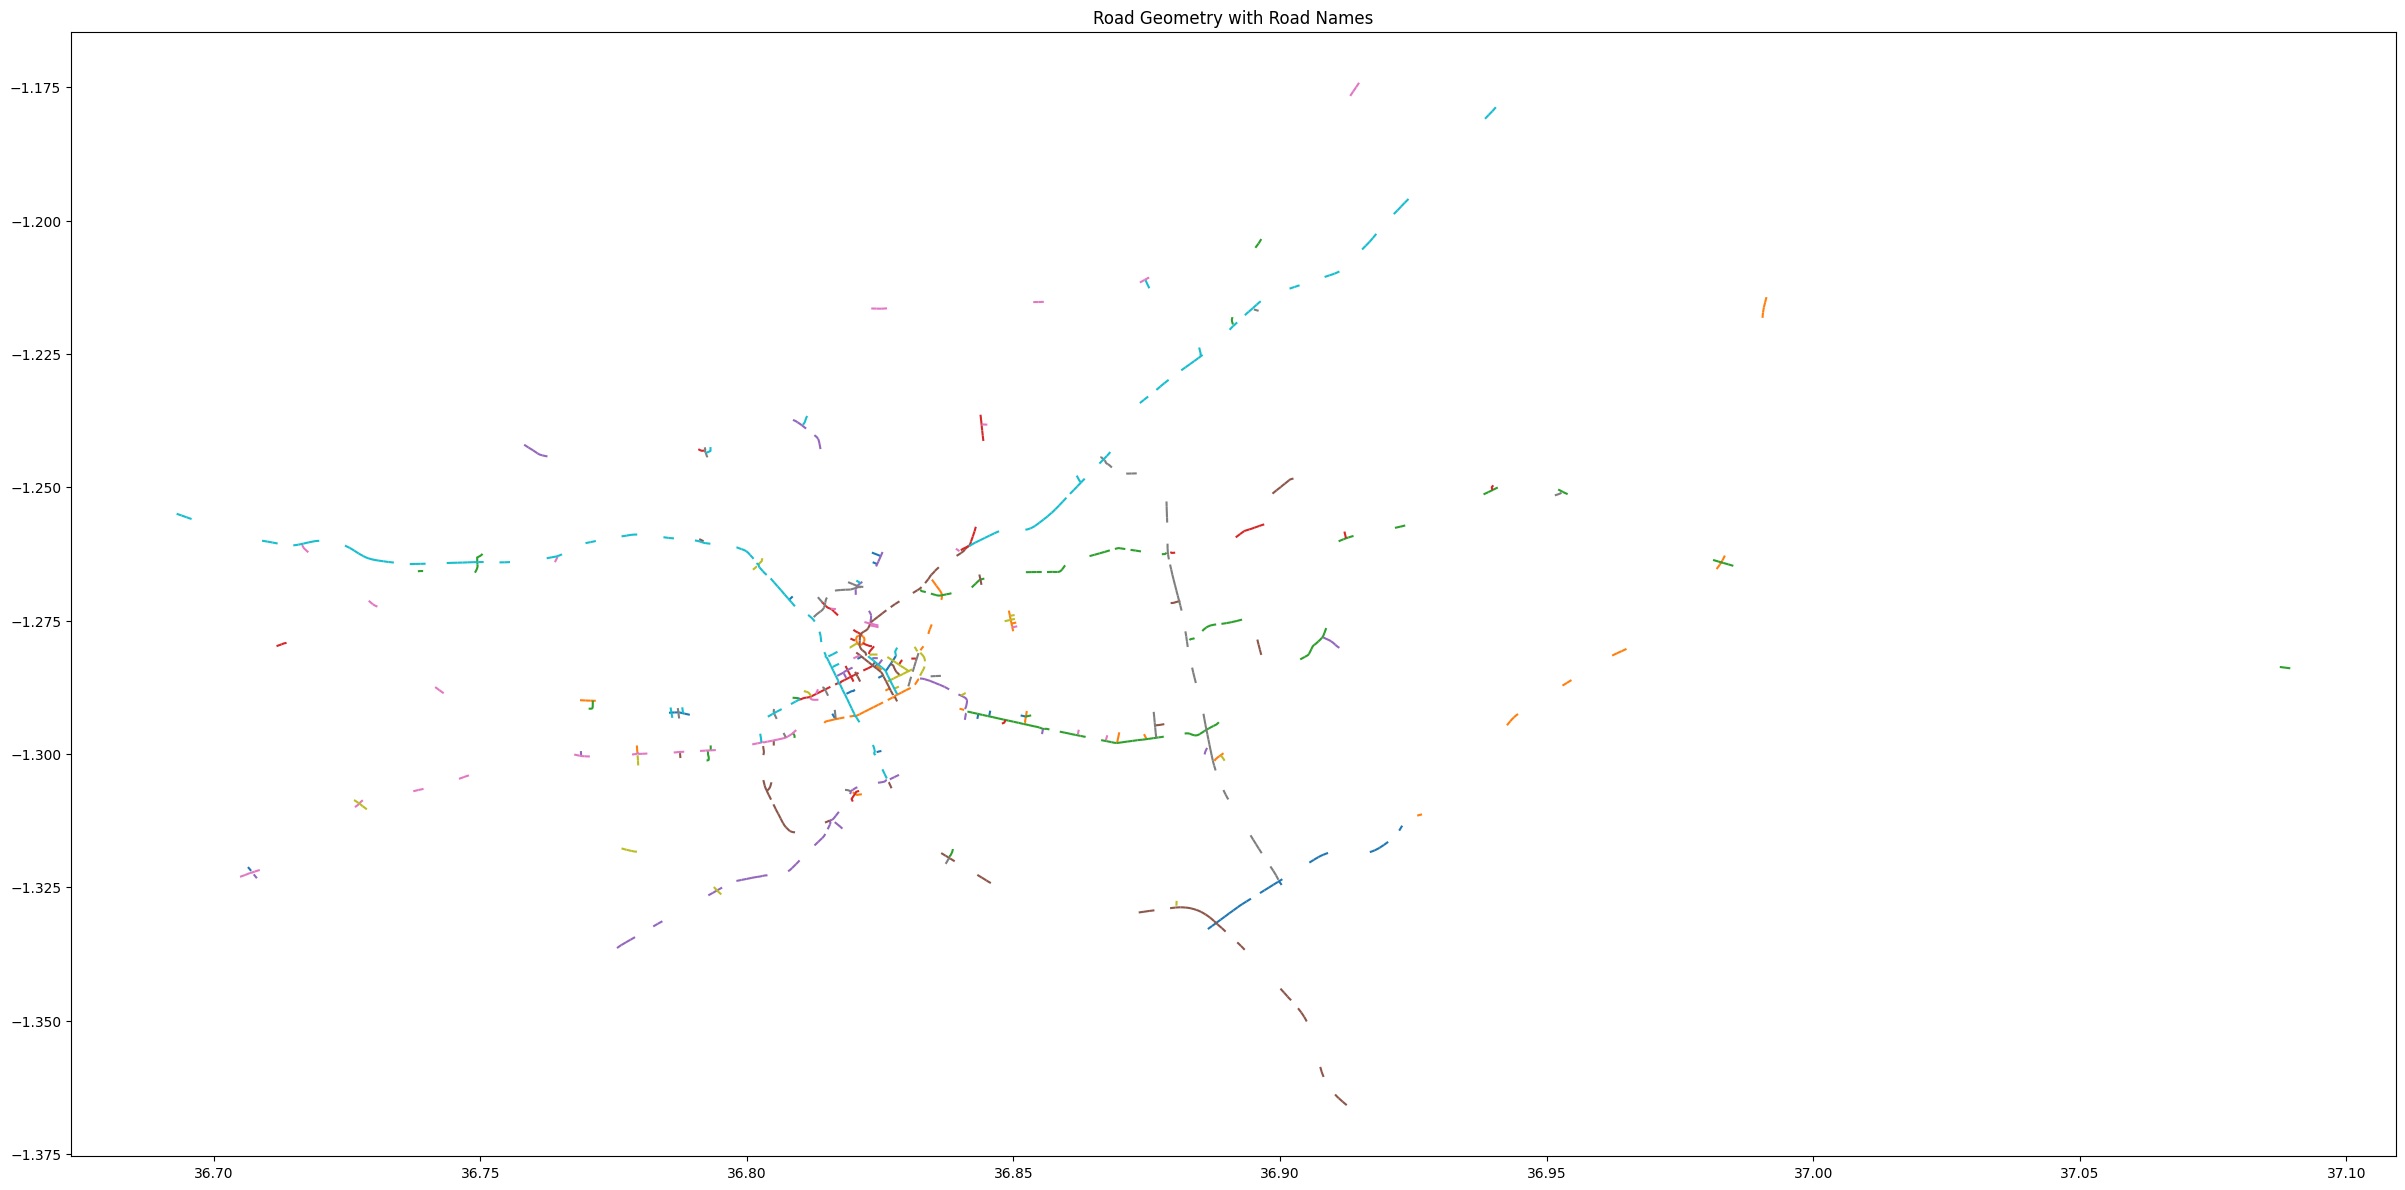

In [4]:
fig, ax = plt.subplots(figsize=(30,30))
segment.plot(column='road_name', legend=False, ax=ax)
plt.title("Road Geometry with Road Names")
plt.show()

In [5]:
train_data = pd.read_csv('Train.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6318 entries, 0 to 6317
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   uid        6318 non-null   int64  
 1   datetime   6318 non-null   object 
 2   latitude   6318 non-null   float64
 3   longitude  6318 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 197.6+ KB


In [6]:
weather_info = pd.read_csv('Weather_Nairobi_Daily_GFS.csv')
weather_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  731 non-null    object 
 1   precipitable_water_entire_atmosphere  728 non-null    float64
 2   relative_humidity_2m_above_ground     728 non-null    float64
 3   specific_humidity_2m_above_ground     728 non-null    float64
 4   temperature_2m_above_ground           728 non-null    float64
 5   u_component_of_wind_10m_above_ground  728 non-null    float64
 6   v_component_of_wind_10m_above_ground  728 non-null    float64
dtypes: float64(6), object(1)
memory usage: 40.1+ KB


In [7]:
segment_info = pd.read_csv('Segment_info.csv')
segment_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Columns: 228 entries, segment_id to 80_97_61_39_16
dtypes: float64(27), int64(200), object(1)
memory usage: 2.7+ MB


In [8]:
segment_info.columns

Index(['segment_id', 'side', '25_48', '79_76', '79_65', '79_39', '28_78_50',
       '55_90', '26_76', '92_30',
       ...
       '80_97_61_65_11', '80_97_61_65_12', '80_97_61_65_15', '80_97_61_65_16',
       '80_97_61_39_0', '80_97_61_39_10', '80_97_61_39_11', '80_97_61_39_12',
       '80_97_61_39_15', '80_97_61_39_16'],
      dtype='object', length=228)

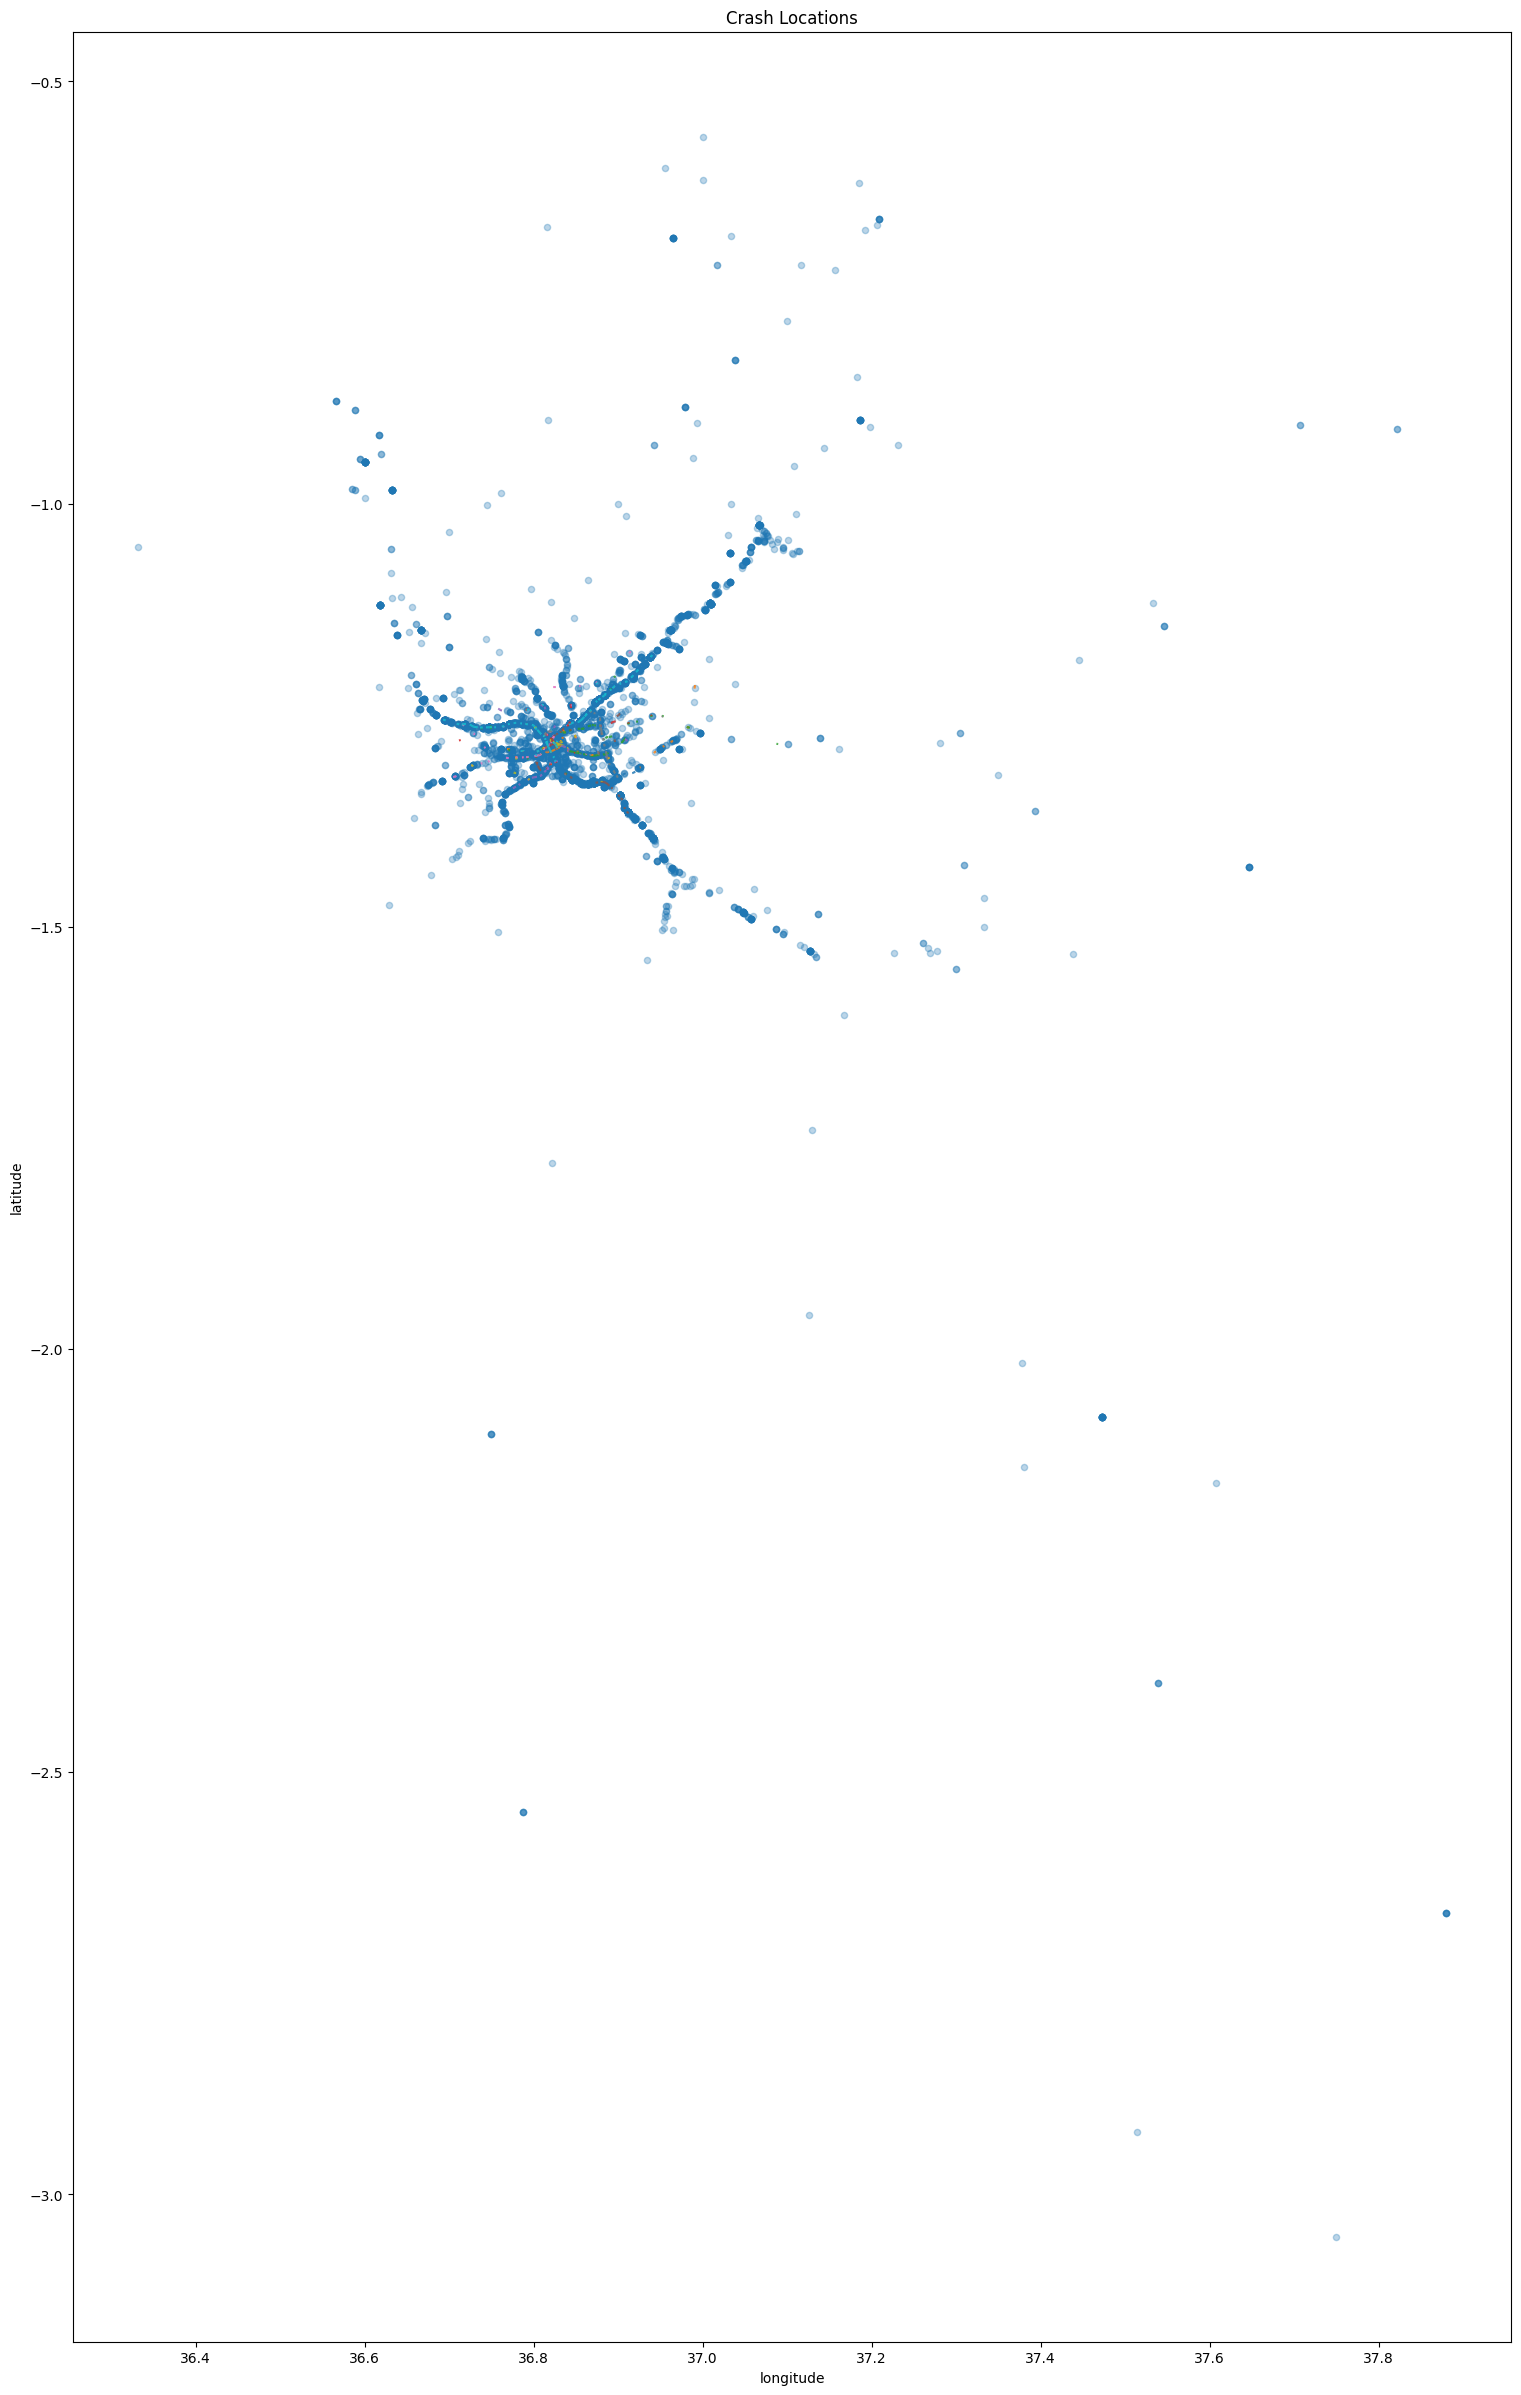

In [9]:
ax = segment.plot(column='road_name',legend=False,figsize=(30,30))
train_data.plot(x='longitude', y='latitude', kind='scatter',alpha = 0.3, title='Crash Locations',ax = ax)
plt.show()

In [10]:
weather_info.describe()

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,23.977231,83.160478,0.010955,15.175692,-1.907236,-1.128133
std,4.693146,9.084966,0.001326,1.127291,1.250924,1.118509
min,10.800000,42.200001,0.006380,11.749994,-5.880168,-3.796548
25%,20.700001,79.887714,0.010057,14.430894,-2.736363,-1.978961
50%,24.024831,85.626667,0.011251,15.231058,-1.953043,-1.084154
75%,27.500000,89.599998,0.011940,15.916383,-1.167893,-0.274010
max,34.000000,95.769302,0.013284,19.928125,3.478000,1.973149


In [11]:
segment

,segment_id,road_name,geometry
0,28_1,accra road-tertiary,"LINESTRING (36.82603 -1.28447, 36.82605 -1.284..."
1,137_1,accra road-tertiary,"LINESTRING (36.82656 -1.28371, 36.82658 -1.283..."
2,137_2,accra road-tertiary,"LINESTRING (36.82711 -1.28289, 36.82713 -1.282..."
3,1_1,airport north road-primary,"LINESTRING (36.88646 -1.33284, 36.88649 -1.332..."
4,1_2,airport north road-primary,"LINESTRING (36.88726 -1.33226, 36.88729 -1.332..."
...,...,...,...
787,243_8,thika road-primary,"LINESTRING (36.84285 -1.26037, 36.84281 -1.260..."
788,271_1,waiyaki way-trunk,"LINESTRING (36.72987 -1.26356, 36.72991 -1.263..."
789,271_2,waiyaki way-trunk,"LINESTRING (36.73084 -1.26374, 36.73089 -1.263..."
790,271_3,waiyaki way-trunk,"LINESTRING (36.73182 -1.26388, 36.73187 -1.263..."


In [12]:
segment.to_crs('epsg:4326')

,segment_id,road_name,geometry
0,28_1,accra road-tertiary,"LINESTRING (36.82603 -1.28447, 36.82605 -1.284..."
1,137_1,accra road-tertiary,"LINESTRING (36.82656 -1.28371, 36.82658 -1.283..."
2,137_2,accra road-tertiary,"LINESTRING (36.82711 -1.28289, 36.82713 -1.282..."
3,1_1,airport north road-primary,"LINESTRING (36.88646 -1.33284, 36.88649 -1.332..."
4,1_2,airport north road-primary,"LINESTRING (36.88726 -1.33226, 36.88729 -1.332..."
...,...,...,...
787,243_8,thika road-primary,"LINESTRING (36.84285 -1.26037, 36.84281 -1.260..."
788,271_1,waiyaki way-trunk,"LINESTRING (36.72987 -1.26356, 36.72991 -1.263..."
789,271_2,waiyaki way-trunk,"LINESTRING (36.73084 -1.26374, 36.73089 -1.263..."
790,271_3,waiyaki way-trunk,"LINESTRING (36.73182 -1.26388, 36.73187 -1.263..."


In [13]:
train_data

,uid,datetime,latitude,longitude
0,1,2018-01-01 00:25:46,-1.188850,36.931382
1,2,2018-01-01 02:02:39,-0.662939,37.208730
2,3,2018-01-01 02:31:49,-0.662939,37.208730
3,4,2018-01-01 03:04:01,-1.288087,36.826583
4,5,2018-01-01 03:58:49,-1.188850,36.931382
...,...,...,...,...
6313,6314,2019-06-29 18:52:44,-1.262271,36.726540
6314,6315,2019-06-30 09:57:44,-1.279468,36.790449
6315,6316,2019-06-30 12:02:14,-1.322109,36.825248
6316,6317,2019-06-30 16:59:14,-1.278589,36.816518


In [14]:
training_data = train_data.drop(columns=['uid','datetime'])

In [15]:
from sklearn.model_selection import train_test_split
X_train ,X_Test = train_test_split(training_data,test_size=0.2,random_state=42)

Use Agglomerative clustering to model the data

In [27]:
import tensorflow as tf

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2,activation='linear')  # Output layer with 2 units for latitude and longitude
])

# Compile the model
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

# Train the neural network
model.fit(X_train,X_train, epochs=200, batch_size=25,verbose=1)

# Extract features from intermediate layers
intermediate_layer_model = tf.keras.Model(inputs=model.input,
                                            outputs=model.layers[5].output)
features = intermediate_layer_model.predict(X_train)
features

Epoch 1/200
203/203 [==============================] - 2s 3ms/step - loss: 36.6909 - accuracy: 0.9852
Epoch 2/200
203/203 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 1.0000
Epoch 3/200
203/203 [==============================] - 1s 3ms/step - loss: 0.0091 - accuracy: 1.0000
Epoch 4/200
203/203 [==============================] - 1s 3ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 5/200
203/203 [==============================] - 1s 3ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 6/200
203/203 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 7/200
203/203 [==============================] - 1s 3ms/step - loss: 0.0093 - accuracy: 1.0000
Epoch 8/200
203/203 [==============================] - 1s 3ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 9/200
203/203 [==============================] - 1s 3ms/step - loss: 0.0091 - accuracy: 1.0000
Epoch 10/200
203/203 [==============================] - 1s 3ms/step - loss: 0.0110 - accur

array([[-1.2489508, 36.914738 ],
       [-0.9354662, 36.728035 ],
       [-1.2400846, 36.97691  ],
       ...,
       [-1.2489839, 36.910946 ],
       [-1.2646654, 36.963306 ],
       [-1.2486763, 36.9142   ]], dtype=float32)

In [17]:
features_df = pd.DataFrame(features.astype(np.float64),columns=['latitude','longitude'])
features_df

,latitude,longitude
0,-1.289024,36.810646
1,-0.989527,36.611237
2,-1.280791,36.872185
3,-1.290455,36.735035
4,-1.260832,36.889404
...,...,...
5049,-1.292049,36.762852
5050,-1.287549,36.856529
5051,-1.289046,36.806870
5052,-1.304040,36.859669


In [18]:
X_Test

,latitude,longitude
4082,-1.230255,36.841331
6241,-1.285870,36.823195
712,-1.281324,36.822648
3648,-1.149238,36.667043
2666,-1.329951,36.866519
...,...,...
1433,-1.395628,36.941025
292,-1.193348,36.839979
1142,-1.294000,36.851785
5004,-1.304789,36.826210


/home/roy/machine-learning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


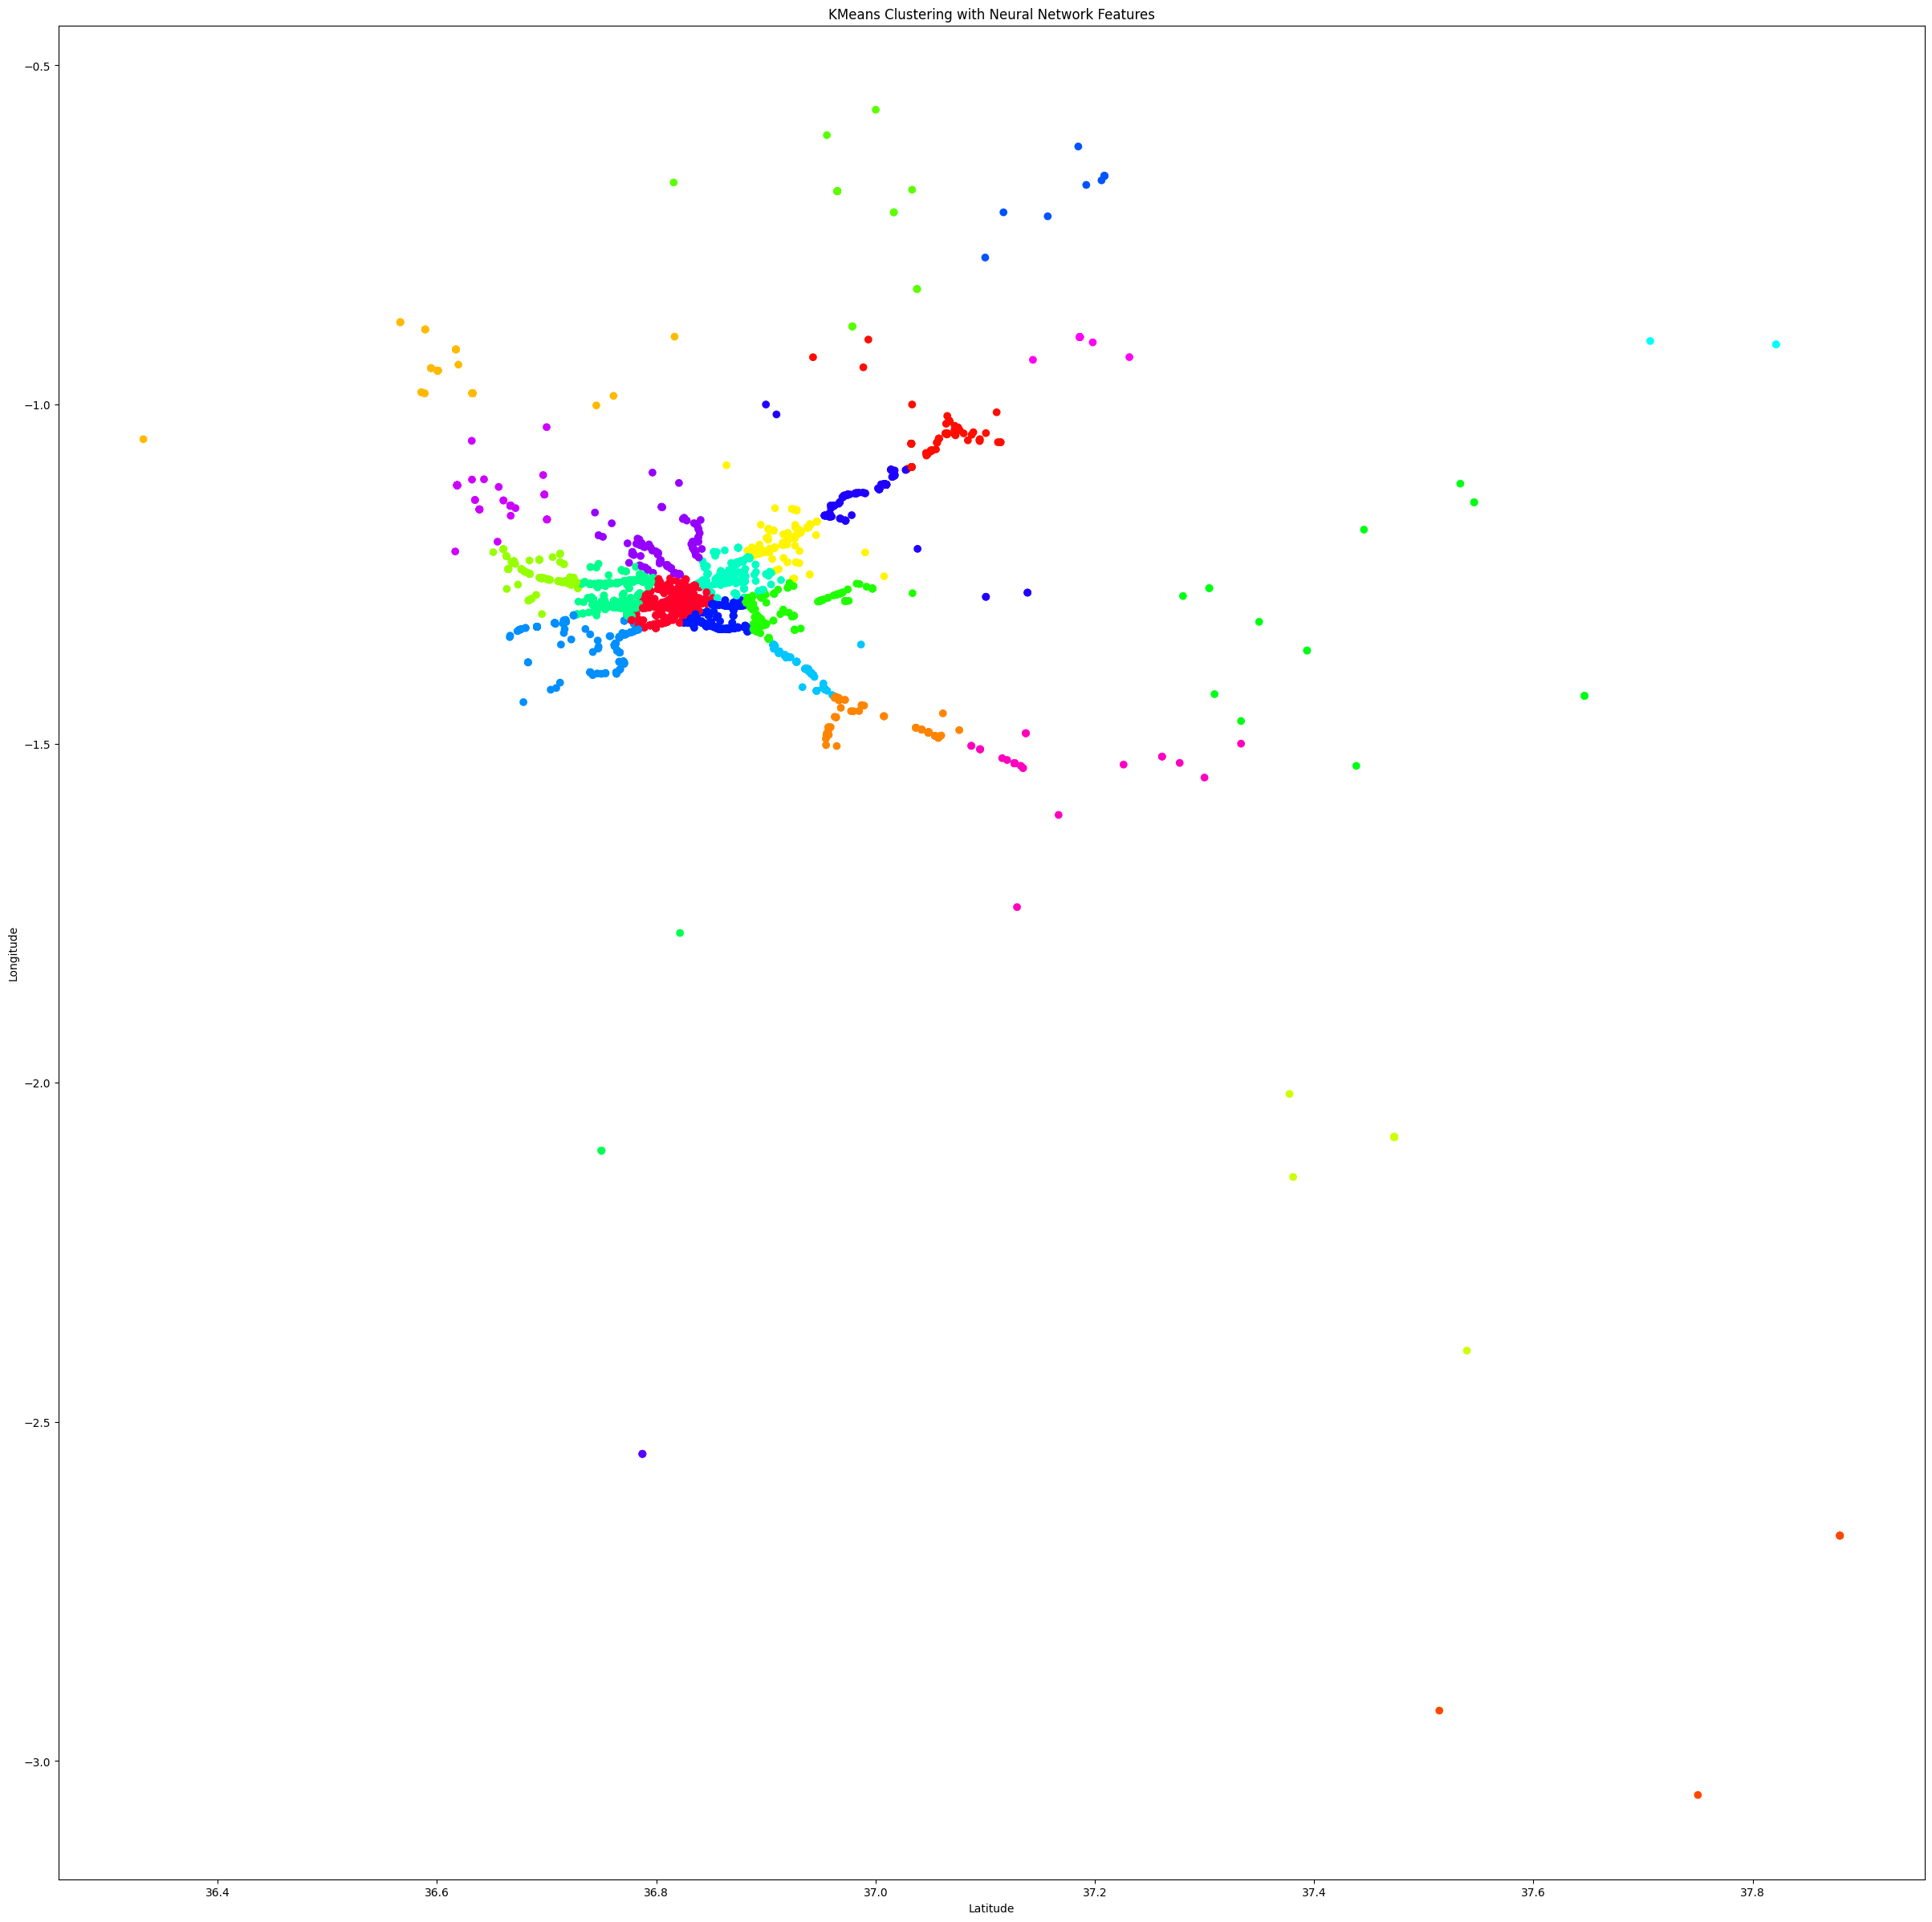

In [19]:
from sklearn.cluster import KMeans

# Apply hierarchical clustering
cluster = KMeans(n_clusters=25,random_state=42)
clusters = cluster.fit_predict(features_df)

plt.figure(figsize=(30,30))
plt.scatter(X_train['longitude'], X_train['latitude'], c=clusters, cmap='gist_rainbow')
plt.title('KMeans Clustering with Neural Network Features')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

/home/roy/machine-learning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/roy/machine-learning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/roy/machine-learning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/roy/machine-learning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` wi

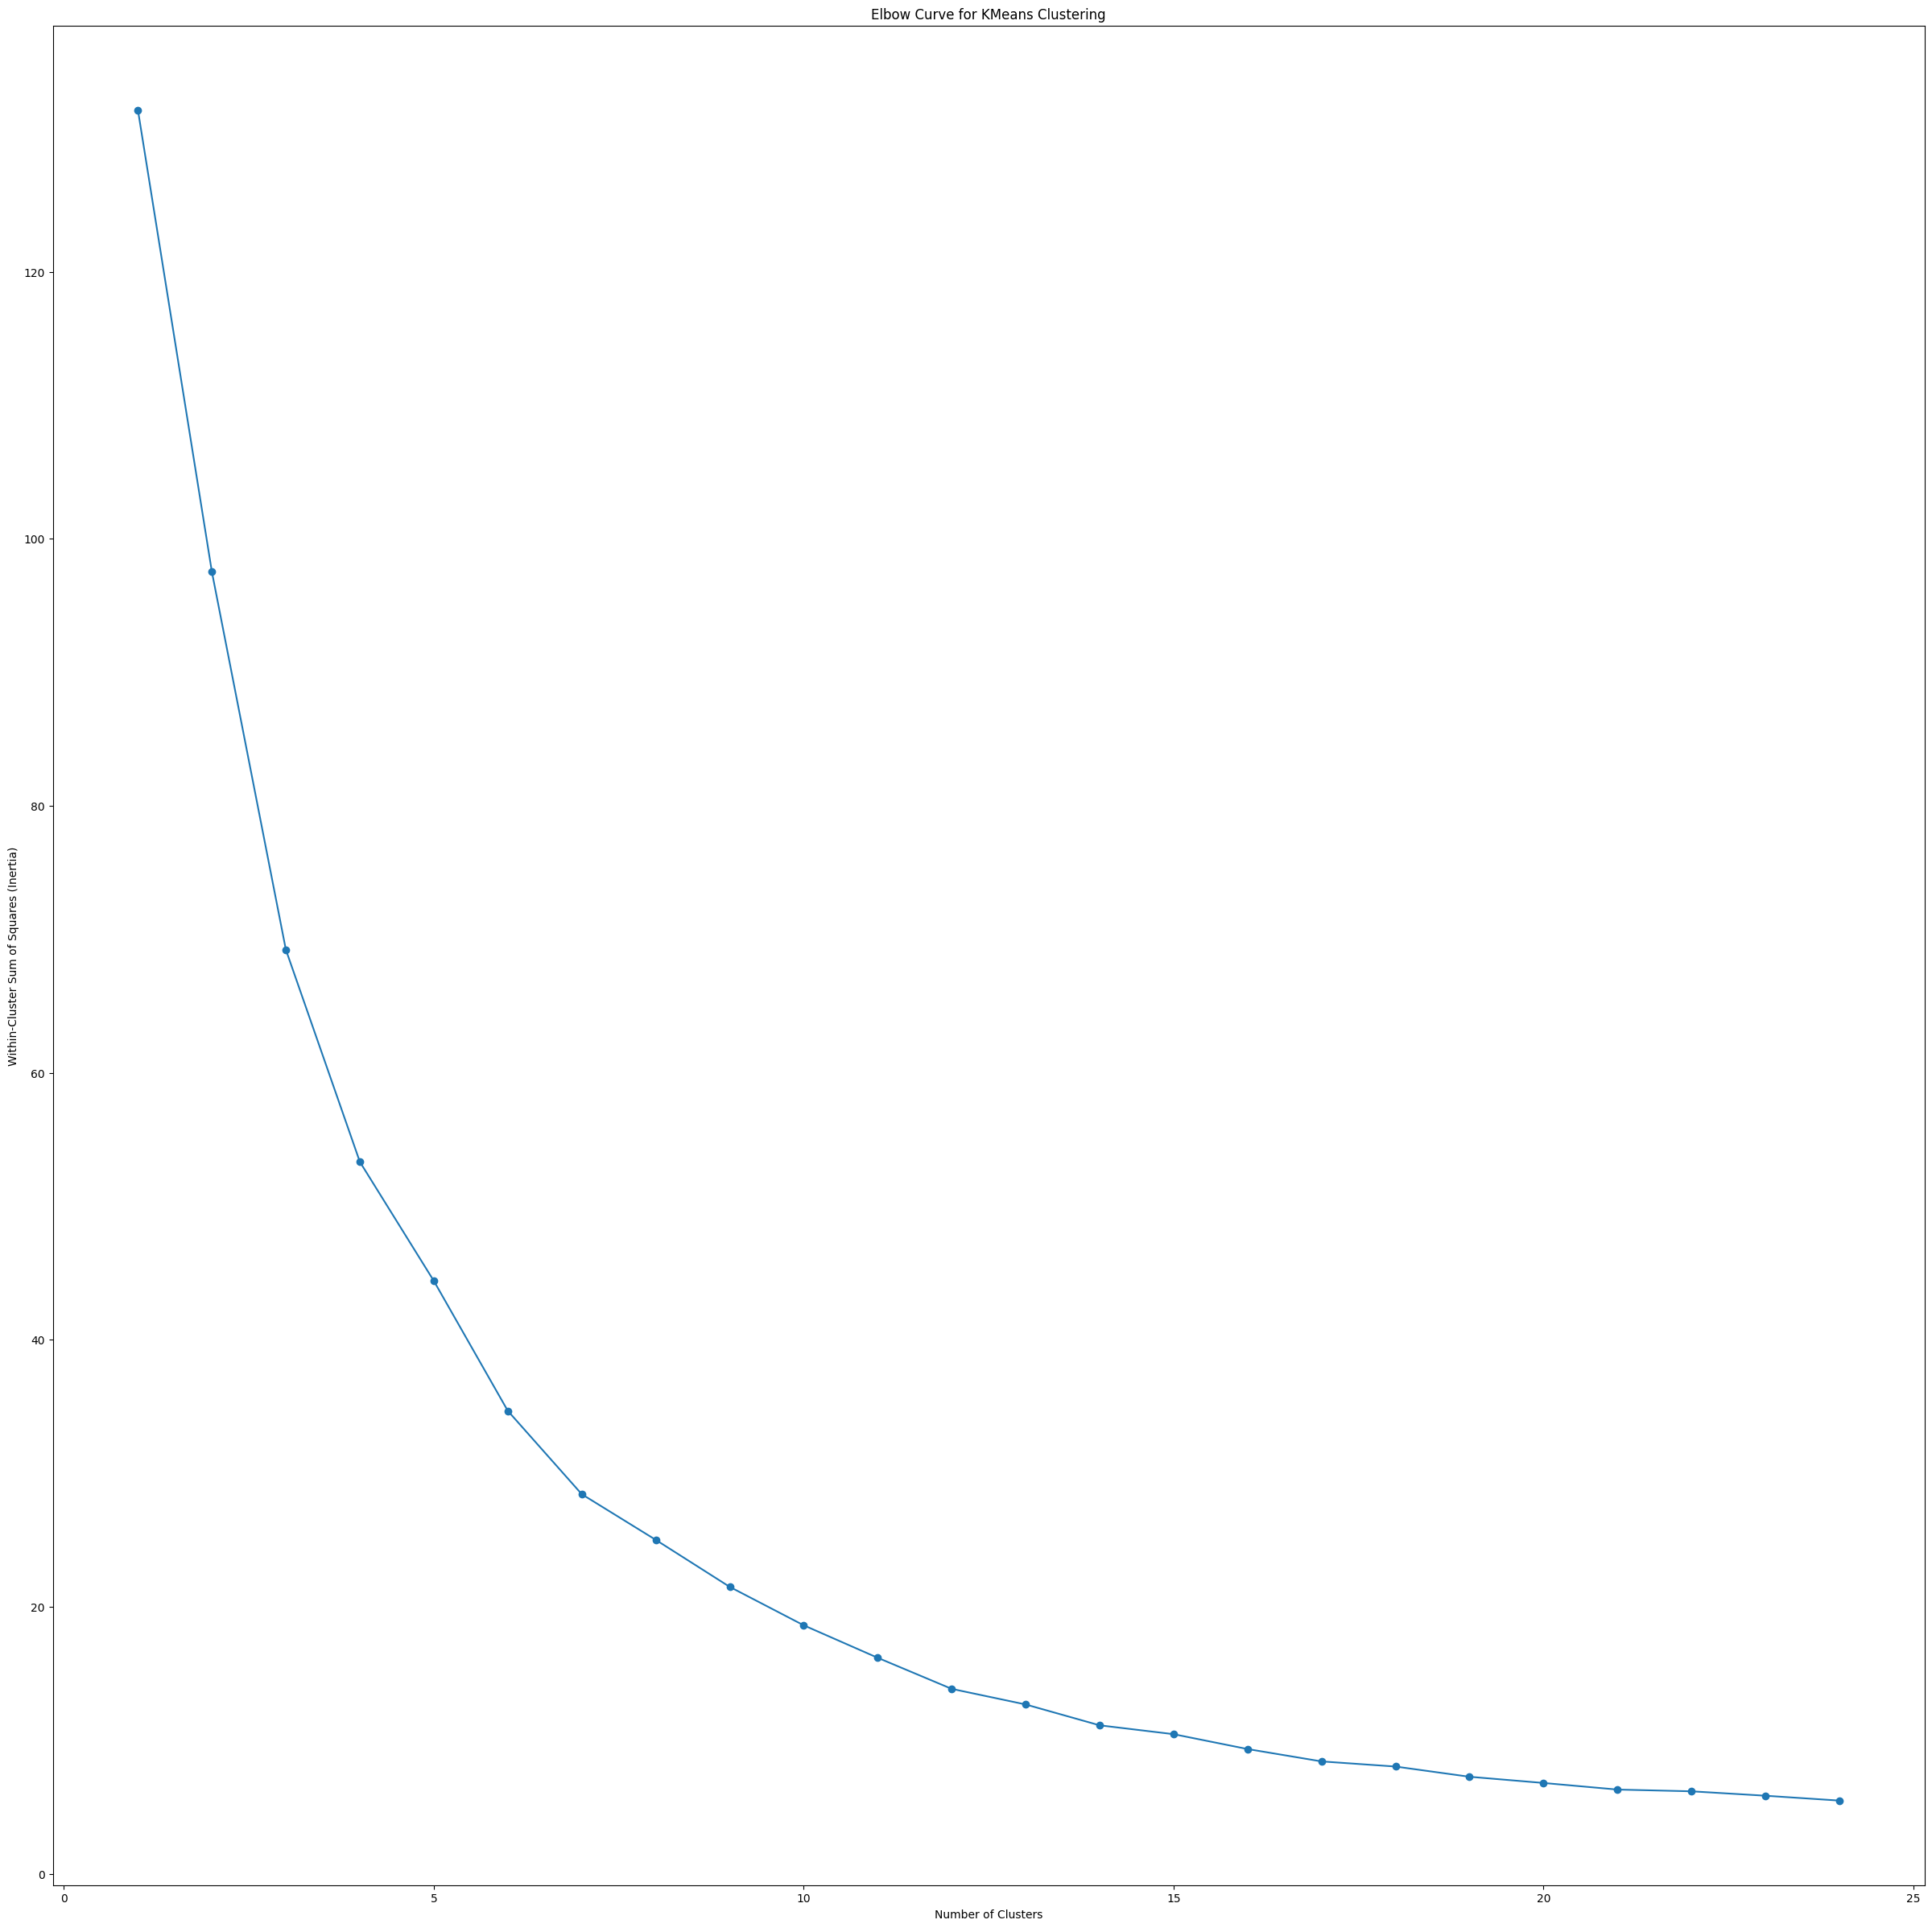

In [20]:
inertia = []

# Try different numbers of clusters
for n_clusters in range(1, 25):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(30,30))
plt.plot(range(1, 25), inertia, marker='o')
plt.title('Elbow Curve for KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def predict_clusters(cluster_pred, new_data):

    assigned_clusters = cluster_pred.predict(new_data)

    return assigned_clusters
new_data = pd.DataFrame({'latitude': [-1.230255],'longitude': [36.841331]})
new_data = new_data.astype(np.float64)
# Make predictions on new data
predicted_clusters = predict_clusters(cluster,new_data)

# Print the predicted clusters
predicted_clusters


array([21], dtype=int32)

In [22]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
silhouette_score = silhouette_score(X_train,clusters)
print(f"Silhouette score: {silhouette_score}")
calinski_harabasz_score = calinski_harabasz_score(X_train,clusters)
print(f"calinski harabasz score: {calinski_harabasz_score}")
davies_bouldin_score = davies_bouldin_score(X_train,clusters)
print(f"davies bouldin score: {davies_bouldin_score}")

Silhouette score: 0.446032851926512
calinski harabasz score: 5278.239056843789
davies bouldin score: 0.60394891261264


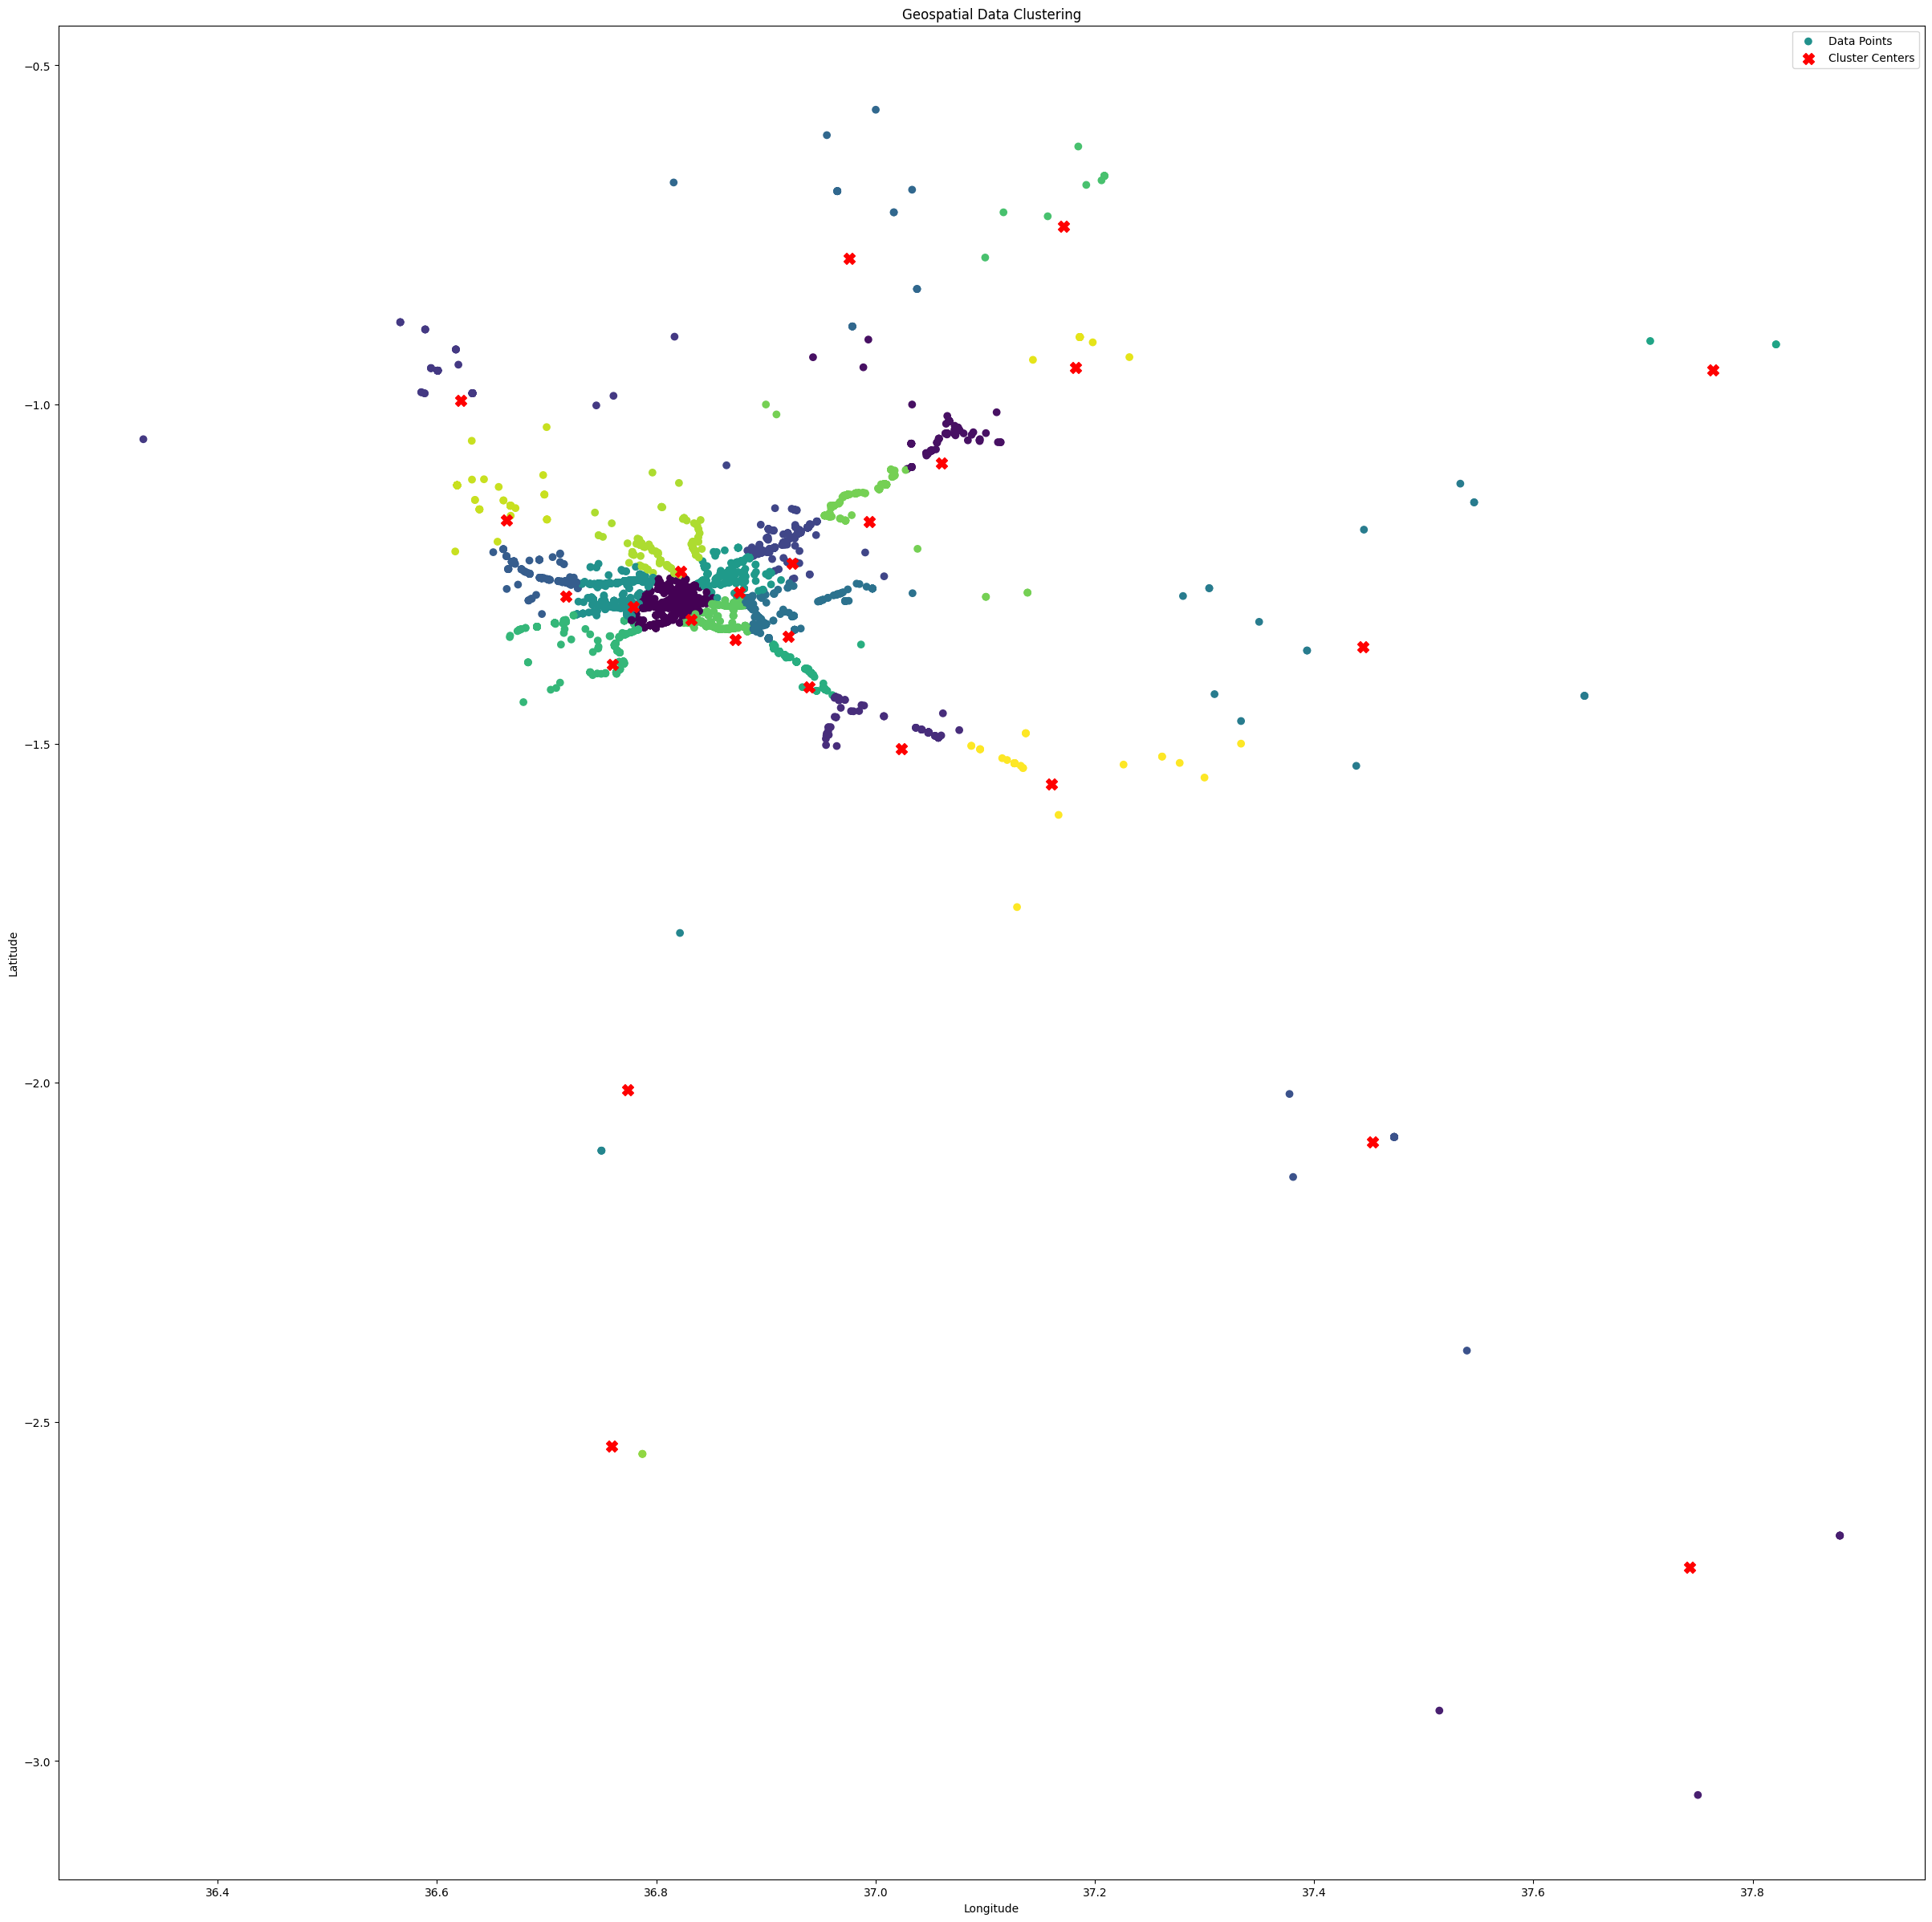

In [23]:
cluster_centers = cluster.cluster_centers_
plt.figure(figsize=(30,30))
plt.scatter(X_train['longitude'], X_train['latitude'], c=cluster.labels_, cmap='viridis', marker='o', label='Data Points')
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], c='red', marker='X', s=100, label='Cluster Centers')
plt.title('Geospatial Data Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians

def haversine_distance(coord1, coord2):
    coord1_rad = [radians(_) for _ in coord1]
    coord2_rad = [radians(_) for _ in coord2]
    result = haversine_distances([coord1_rad, coord2_rad])
    return result * 6371000  # Multiply by Earth radius to get distance in meters

single_point = [-1.230255, 36.841331] 
# Calculate distances between the single point and each cluster centroid
distances_to_clusters = [haversine_distance(single_point, centroid)[0][1]/1000 for centroid in cluster_centers]

# Print distances
for i, distance in enumerate(distances_to_clusters):
    print(f"Distance from the single point to Cluster {i}: {distance:.2f} kilometers")


Distance from the single point to Cluster 0: 9.66 kilometers
Distance from the single point to Cluster 1: 29.16 kilometers
Distance from the single point to Cluster 2: 193.06 kilometers
Distance from the single point to Cluster 3: 36.85 kilometers
Distance from the single point to Cluster 4: 35.85 kilometers
Distance from the single point to Cluster 5: 9.22 kilometers
Distance from the single point to Cluster 6: 117.09 kilometers
Distance from the single point to Cluster 7: 14.89 kilometers
Distance from the single point to Cluster 8: 51.71 kilometers
Distance from the single point to Cluster 9: 15.20 kilometers
Distance from the single point to Cluster 10: 68.50 kilometers
Distance from the single point to Cluster 11: 87.09 kilometers
Distance from the single point to Cluster 12: 10.30 kilometers
Distance from the single point to Cluster 13: 6.47 kilometers
Distance from the single point to Cluster 14: 107.21 kilometers
Distance from the single point to Cluster 15: 23.46 kilometers
Di

In [25]:
#model.save('/home/roy/Documents/Final_Project/NaiRERS/nairers-ml')

In [26]:
import joblib
joblib.dump(cluster,'/home/roy/Documents/Final_Project/NaiRERS/nairers-ml/agg_model.pkl')

FileNotFoundError: [Errno 2] No such file or directory: '/home/roy/Documents/Final_Project/NaiRERS/nairers-ml/agg_model.pkl'

In [ ]:
#import tensorflow as tf
#loaded_model = tf.keras.models.load_model("/home/roy/Documents/Final_Project/NaiRERS/nairers-ml/assets")